In [28]:
from modules.stats_v3 import *
from modules.helper_functions_v3 import plot_pretty
from modules.plot_functions_v3 import plot_general

import config

import __main__
from sys import argv
from os.path import join, isdir
from os import makedirs

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
plot_pretty()
saveimage = True

In [30]:
X_type = 'R_med'
Y_type = 'D_rms'
is_surv_probs = True

In [31]:
from string import Template

brightest_dir_template = Template(join('${gendata_dir}', config.gendata_brightest_name_template.safe_substitute(_300kpc='_300kpc')))
elvis_isolated_dir = join(config.raw_dir,config.elvis_isolated_raw_name)
caterpillar_dir = join(config.raw_dir,config.caterpillar_raw_name)
save_dir = join(config.result_dir,'general')
if not isdir(save_dir):
  makedirs(save_dir)

In [32]:
# plot_general(elvis_dir, None, brightest_dir_template, X_type=X_type, Y_type=Y_type, 
#              is_surv_probs=is_surv_probs, save_dir=save_dir, saveimage=saveimage, figsize=(5,5))

## Figure 1: D_rms − R_med plot. One panel is 11 brightest in Caterpillar and ELVIS without disruption probability accounting

In [37]:
def plot_D_rms_R_med_elvis_caterpillar_without_surv_probs(figsize=(5,5)):
  plot_general(elvis_isolated_dir=elvis_isolated_dir, caterpillar_dir=caterpillar_dir, 
               brightest_dir_template=brightest_dir_template, X_type='R_med', Y_type='D_rms', 
               is_surv_probs=False, save_dir=save_dir, saveimage=saveimage, figsize=figsize)

def plot_D_rms_R_med_elvis_caterpillar_with_surv_probs(figsize=(5,5)):
  plot_general(elvis_isolated_dir=elvis_isolated_dir, caterpillar_dir=caterpillar_dir, 
               brightest_dir_template=brightest_dir_template, X_type='R_med', Y_type='D_rms', 
               is_surv_probs=True, save_dir=save_dir, saveimage=saveimage, figsize=figsize)

Running for iBurr
Running for iCharybdis
Running for iCher
Running for iDouglas
Running for iHall
Running for iHamilton
Running for iHera
Running for iKauket
Running for iKek
Running for iLincoln
Running for iLouise
Running for iOates
Running for iOrion
Running for iRemus
Running for iRomulus
Running for iRoy
Running for iScylla
Running for iSerena
Running for iSiegfried
Running for iSonny
Running for iTaurus
Running for iThelma
Running for iVenus
Running for iZeus
Running for caterpillar_10_LX14
Running for caterpillar_12_LX14
Running for caterpillar_13_LX14
Running for caterpillar_14_LX14
Running for caterpillar_15_LX14
Running for caterpillar_16_LX14
Running for caterpillar_17_LX14
Running for caterpillar_18_LX14
Running for caterpillar_19_LX14
Running for caterpillar_1_LX14
Running for caterpillar_20_LX14
Running for caterpillar_21_LX14
Running for caterpillar_22_LX14
Running for caterpillar_23_LX14
Running for caterpillar_24_LX14
Running for caterpillar_25_LX14
Running for caterpi

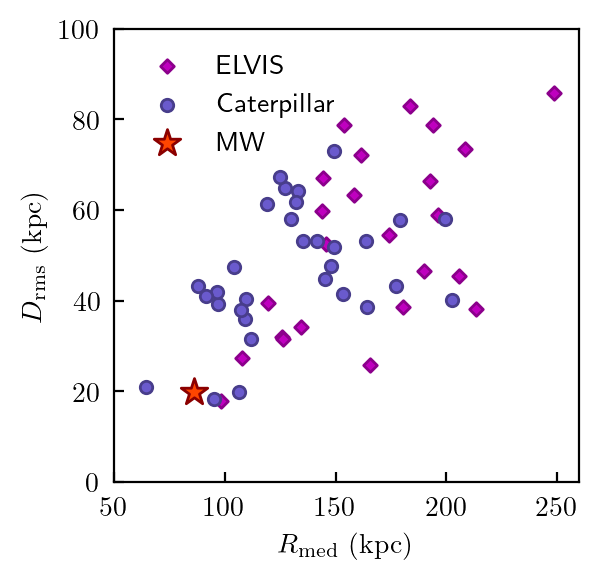

In [34]:

plot_D_rms_R_med_elvis_caterpillar_without_surv_probs(figsize=(3,3))


Running for iBurr
Running for iCharybdis
Running for iCher
Running for iDouglas
Running for iHall
Running for iHamilton
Running for iHera
Running for iKauket
Running for iKek
Running for iLincoln
Running for iLouise
Running for iOates
Running for iOrion
Running for iRemus
Running for iRomulus
Running for iRoy
Running for iScylla
Running for iSerena
Running for iSiegfried
Running for iSonny
Running for iTaurus
Running for iThelma
Running for iVenus
Running for iZeus
Running for caterpillar_10_LX14
Running for caterpillar_12_LX14
Running for caterpillar_13_LX14
Running for caterpillar_14_LX14
Running for caterpillar_15_LX14
Running for caterpillar_16_LX14
Running for caterpillar_17_LX14
Running for caterpillar_18_LX14
Running for caterpillar_19_LX14
Running for caterpillar_1_LX14
Running for caterpillar_20_LX14
Running for caterpillar_21_LX14
Running for caterpillar_22_LX14
Running for caterpillar_23_LX14
Running for caterpillar_24_LX14
Running for caterpillar_25_LX14
Running for caterpi

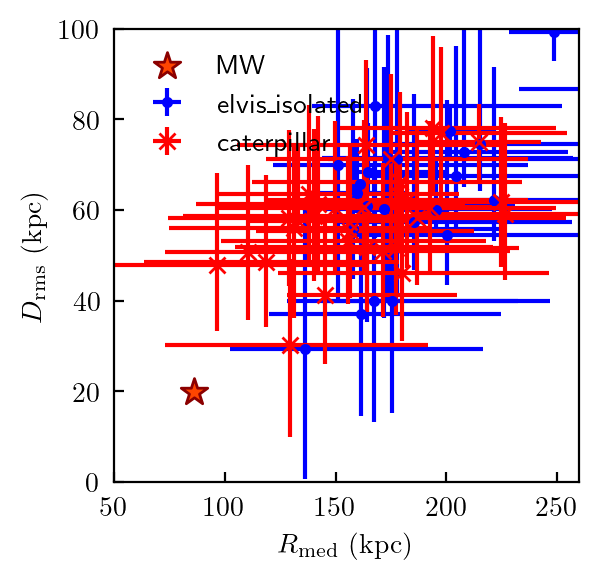

In [38]:
plot_D_rms_R_med_elvis_caterpillar_with_surv_probs(figsize=(3,3))

## Figure 2. D_rms − R_med plot. First panel: 11 brightest in Caterpillar and medians and 95 and 99 percentiles (as error bars) of the distributions without accounting for survival + MW. Second panel: 11 brightest in Caterpillar accounting for survival probability + MW, showing 95 and 99% as error bars + median and 95 and 99% as error bars of the overall distribution.

In [8]:
data_dir = join(config.gendata_dir, config.gendata_name_template.substitute(catalog='caterpillar', _300kpc='_300kpc', _surv_probs=''))
data_surv_probs_dir = join(config.gendata_dir, config.gendata_name_template.substitute(catalog='caterpillar', _300kpc='_300kpc', _surv_probs='_surv_probs'))
brightest_dir = join(config.gendata_dir, config.gendata_brightest_name_template.substitute(catalog='caterpillar', _300kpc='_300kpc'))

/Users/khanhnp/Desktop/NewProject/SatelliteAnisotropy/src/modules/plot_functions_v3.py:66: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(X, Y, H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = sorted(lvls),
/Users/khanhnp/Desktop/NewProject/SatelliteAnisotropy/src/modules/plot_functions_v3.py:66: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(X, Y, H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = sorted(lvls),


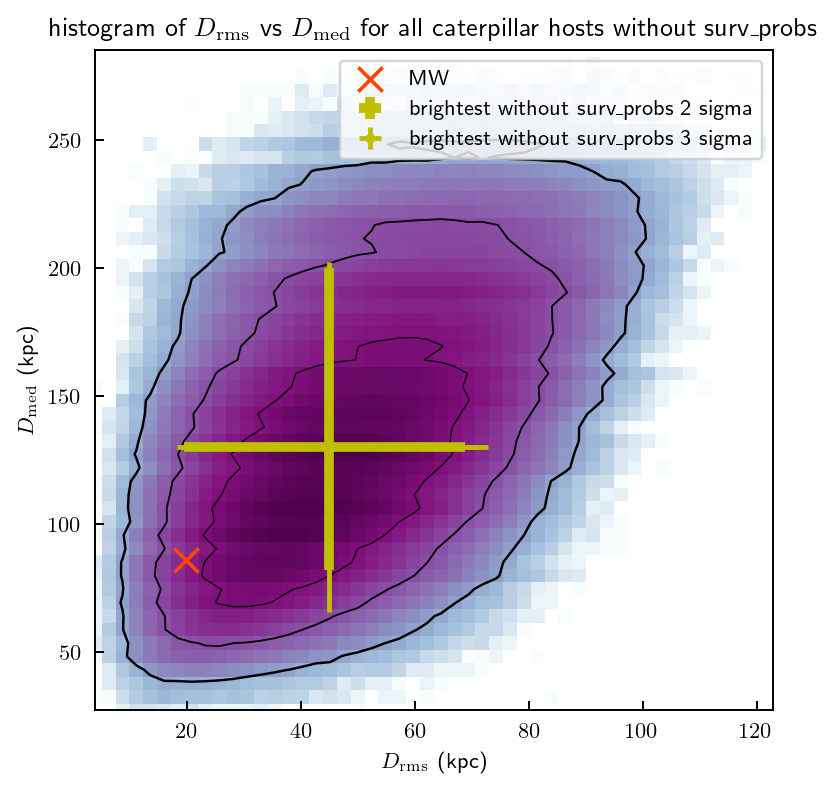

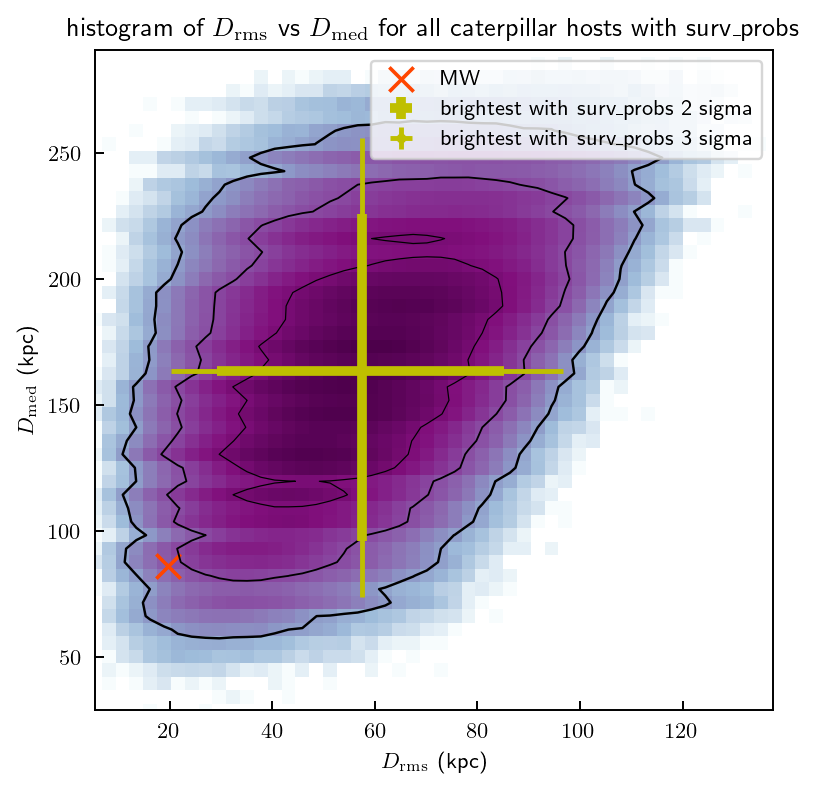

In [9]:
hist_general(data_dir, X_type='D_rms', Y_type='R_med', save_dir=save_dir, saveimage=saveimage, figsize=(5,5))
hist_general(data_surv_probs_dir, brightest_dir=brightest_dir, X_type='D_rms', Y_type='R_med', is_surv_probs=True, save_dir=save_dir, saveimage=saveimage, figsize=(5,5))

## Figure 3. D_sph − D_rms plot. One panel is 11 brightest in Caterpillar without accounting for survival probability + MW, showing 95 and 99% as error bars + median and 95 and 99% as error bars of the overall distribution.. Second panel is 11 brightest in Caterpillar accounting for survival probability + MW, showing 95 and 99% as error bars + median and 95 and 99% as error bars of the overall distribution.

/Users/khanhnp/Desktop/NewProject/SatelliteAnisotropy/src/modules/plot_functions_v3.py:66: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(X, Y, H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = sorted(lvls),
/Users/khanhnp/Desktop/NewProject/SatelliteAnisotropy/src/modules/plot_functions_v3.py:66: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(X, Y, H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = sorted(lvls),


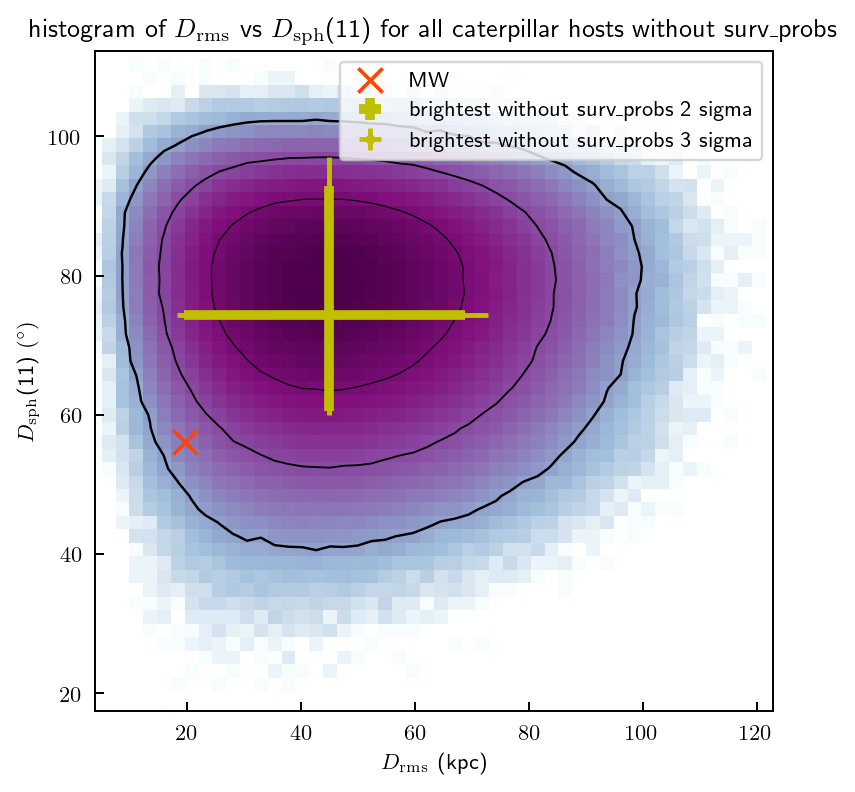

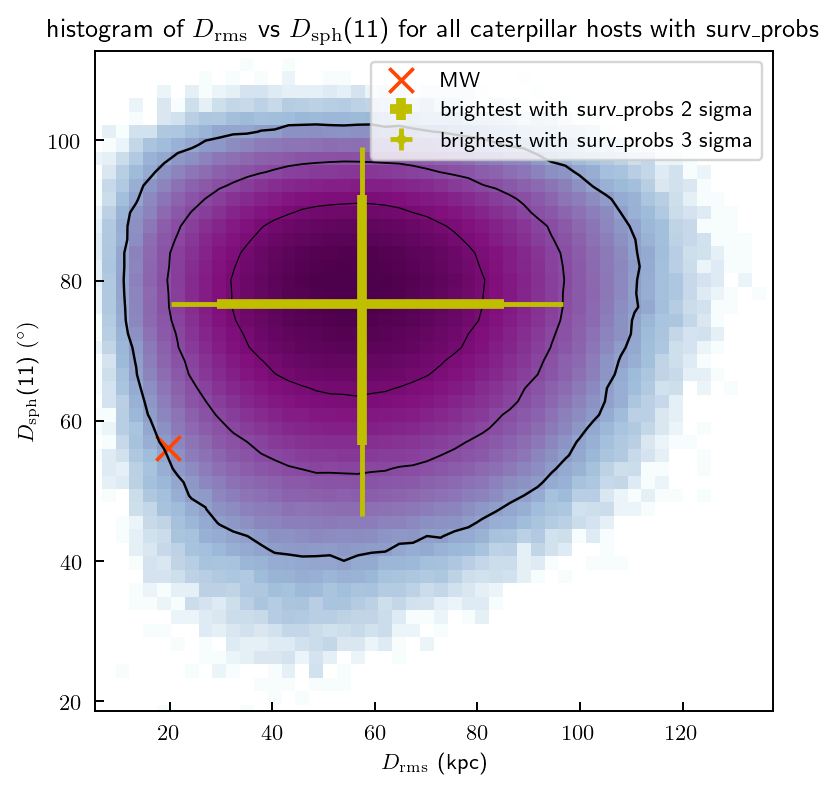

In [10]:
hist_general(data_dir, X_type='D_rms', Y_type='D_sph_11', save_dir=save_dir, saveimage=saveimage, figsize=(5,5))
hist_general(data_surv_probs_dir, brightest_dir=brightest_dir, X_type='D_rms', Y_type='D_sph_11', is_surv_probs=True, save_dir=save_dir, saveimage=saveimage, figsize=(5,5))